In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
import seaborn as sns


In [ ]:
wine_dataset = datasets.load_wine()
wine_DataFrame = pd.DataFrame(data=np.c_[wine_dataset['data'], wine_dataset['target']],
                              columns=wine_dataset['feature_names'] + ['target'])
wine_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.6 KB


In [ ]:
df = wine_DataFrame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0.0


In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float64

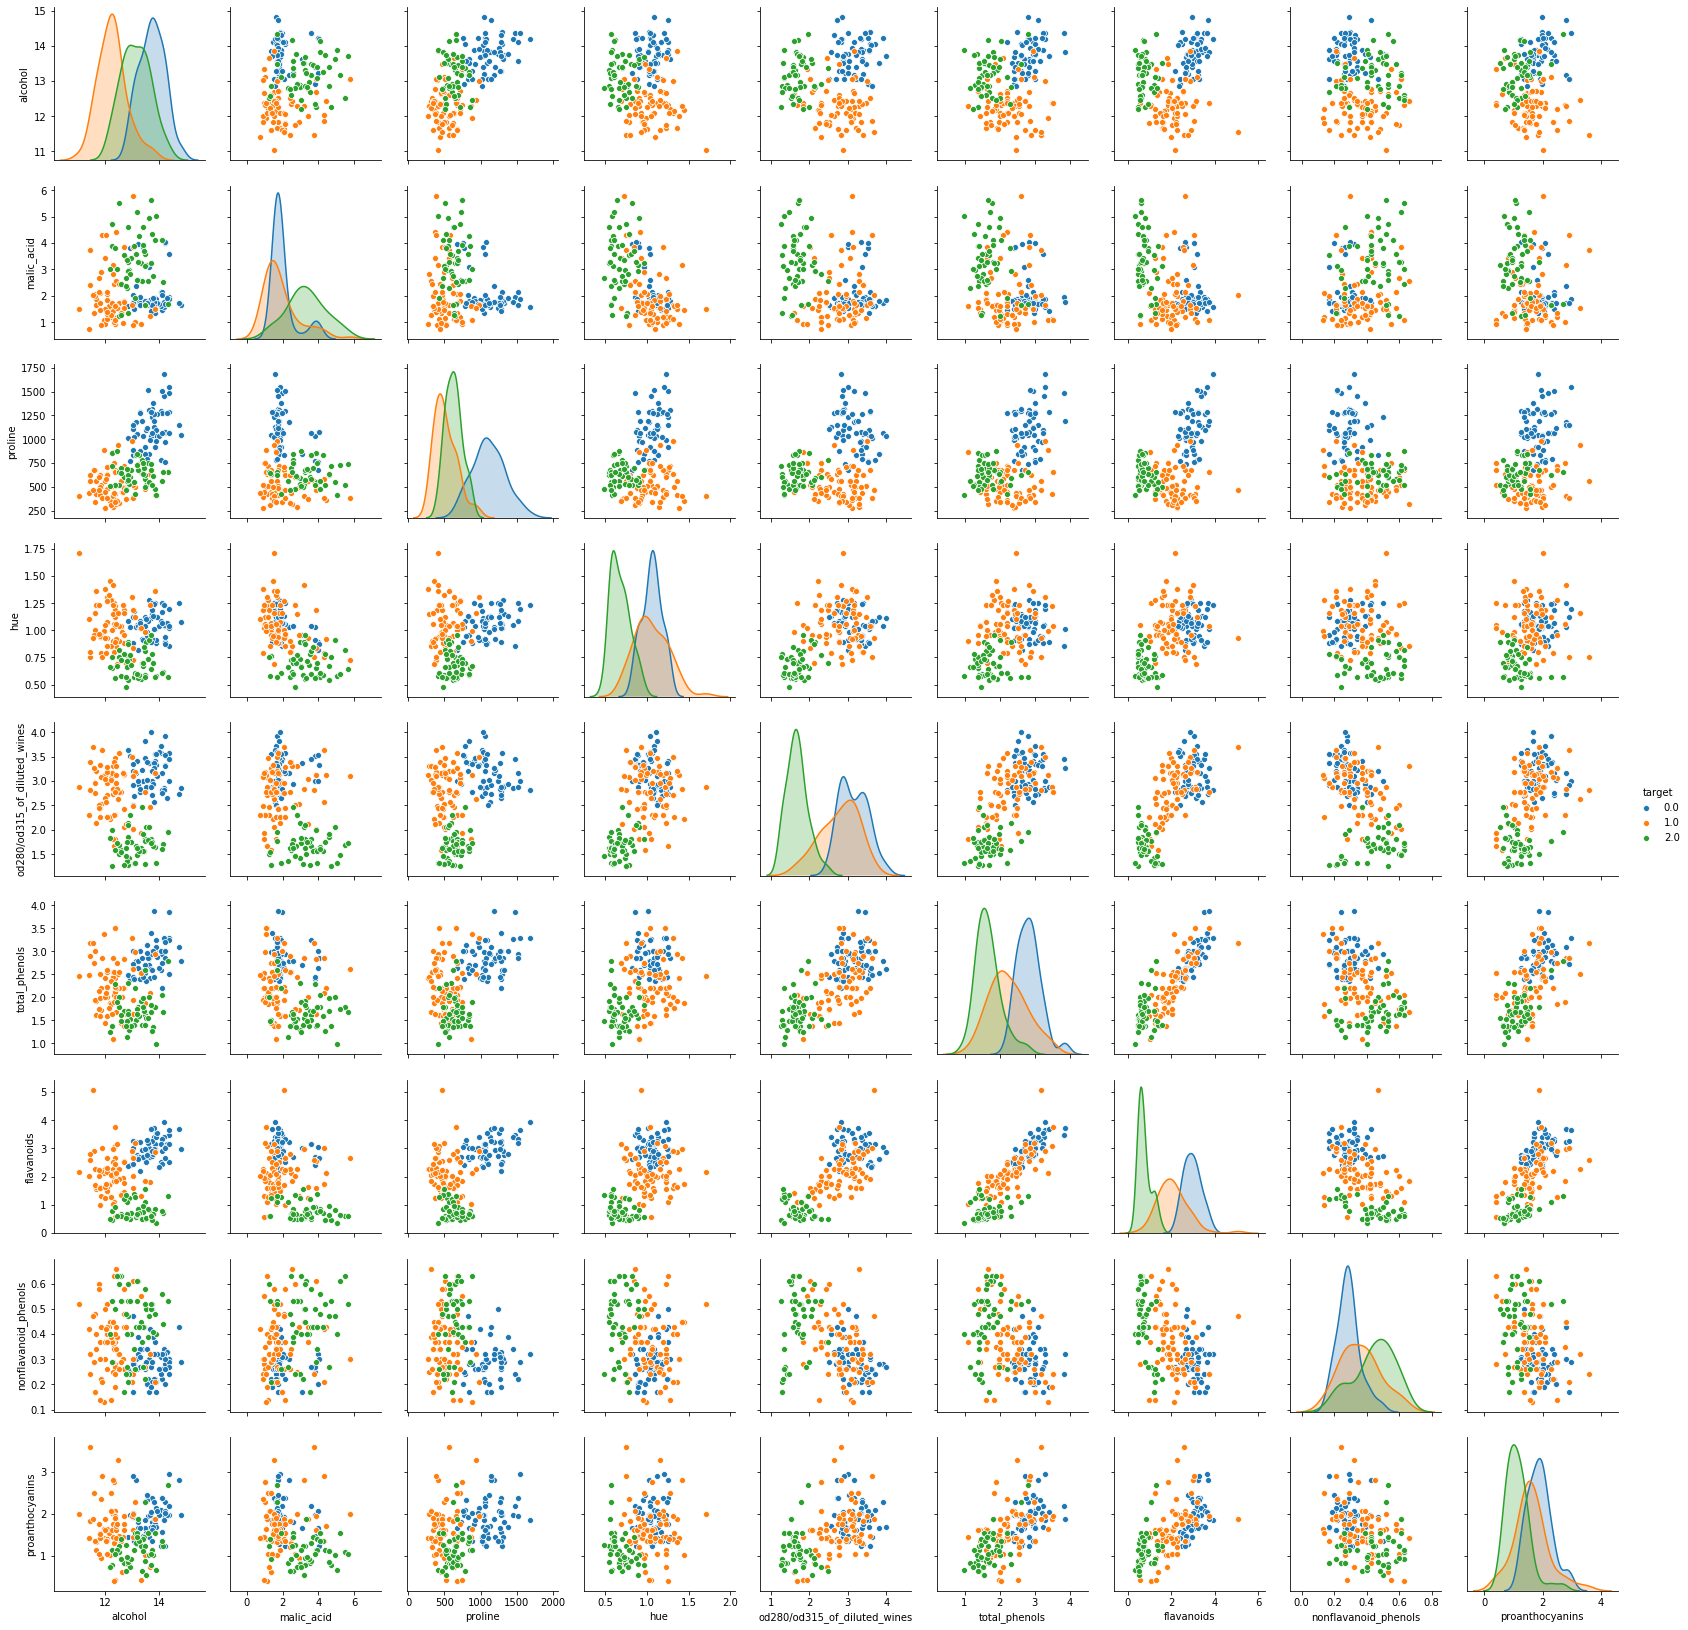

In [ ]:
plot_correlation = sns.pairplot(df, vars=['alcohol','malic_acid', 'proline', 'hue', 'od280/od315_of_diluted_wines', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins'], hue='target')
plot_correlation

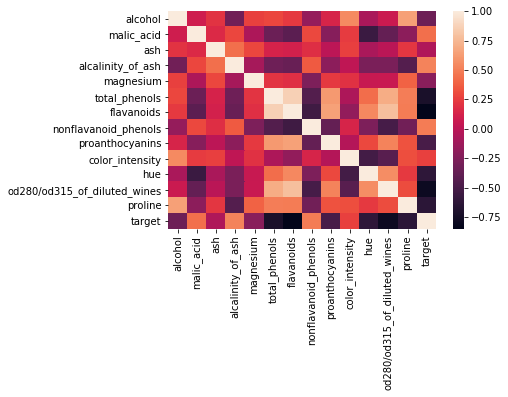

In [ ]:
heatmap_correlation = sns.heatmap(df.corr())
heatmap_correlation

In [ ]:
# colunas a serem mantidas: flavanoids, total_phenols, proline, hue, alcohol, malic_acid, od280/od315_of_diluted_wines
X, y = df[['flavanoids', 'total_phenols', 'proline', 'hue', 'alcohol', 'malic_acid', 'od280/od315_of_diluted_wines']], df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
k = list(x for x in range(30) if x % 2 != 0)
accuracies = list()
errors = list()
best_k = 0
highest_accuracy = 0
lowest_error = 100

for i in k:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy_value = accuracy_score(y_test, y_pred) * 100
    error_value = 100 - accuracy_value.round(2)
    accuracies.append(accuracy_value.round(2))
    errors.append(error_value.round(2))

    if (accuracy_value > highest_accuracy and error_value < lowest_error):
        best_k = i 
        highest_accuracy = accuracy_value.round(2)
        lowest_error = error_value.round(2)
    
    print('k: {0}, accuracy: {1}, error: {2}'.format(i, accuracy_value.round(2), error_value.round(2)))

print('Best k: {0}, with highest accuracy of {1}% and error of {2}%'.format(best_k, highest_accuracy, lowest_error))

    

k: 1, accuracy: 100.0, error: 0.0
k: 3, accuracy: 98.15, error: 1.85
k: 5, accuracy: 98.15, error: 1.85
k: 7, accuracy: 96.3, error: 3.7
k: 9, accuracy: 96.3, error: 3.7
k: 11, accuracy: 94.44, error: 5.56
k: 13, accuracy: 96.3, error: 3.7
k: 15, accuracy: 96.3, error: 3.7
k: 17, accuracy: 96.3, error: 3.7
k: 19, accuracy: 96.3, error: 3.7
k: 21, accuracy: 96.3, error: 3.7
k: 23, accuracy: 94.44, error: 5.56
k: 25, accuracy: 94.44, error: 5.56
k: 27, accuracy: 94.44, error: 5.56
k: 29, accuracy: 96.3, error: 3.7
Best k: 1, with highest accuracy of 100.0% and error of 0.0%


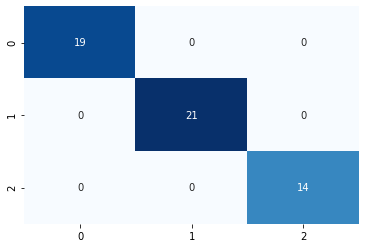

In [ ]:
# Avaliando os resultados para K = 1 (o melhor encontrado):
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        21
         2.0       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



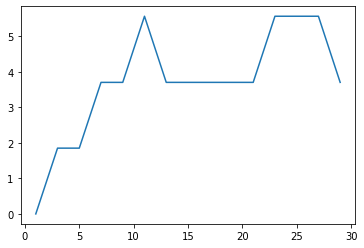

In [ ]:
# Gráfico dos erros
print(plt.plot(k,errors))

In [ ]:
# Usando o K-Fold Cross Validation para obter a média da performance do melhor K (K = 1):
clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: {0:.2f} (+/- {1:.2f})'.format(scores.mean(), (scores.std() * 2)))

Accuracy: 0.78 (+/- 0.12)


In [ ]:
# Reavaliando o classificador usando validação cruzada:
cv_best_k = 0
cv_best_accuracy = 0
cv_lowest_std = 1
cv_accuracies = list()
cv_stds = list()

for j in k:
    cv_knnClassifier = KNeighborsClassifier(n_neighbors=j)
    cv_score = cross_val_score(cv_knnClassifier, X, y, cv=5)
    cv_accuracies.append(cv_score.mean())
    cv_stds.append(cv_score.std() * 2)

    if (cv_score.mean() > cv_best_accuracy and (cv_score.std() * 2) < cv_lowest_std):
        cv_best_k = j
        cv_best_accuracy = cv_score.mean()
        cv_lowest_std = cv_score.std() * 2
    
    print('k: {0}, Accuracy: {1:.2f} (+/- {2:.2f})'.format(j, cv_score.mean(), (cv_score.std() * 2)))

print('Best k: {0}, Accuracy: {1:.2f} (+/- {2:.2f})'.format(cv_best_k,cv_best_accuracy, cv_lowest_std))

k: 1, Accuracy: 0.78 (+/- 0.12)
k: 3, Accuracy: 0.70 (+/- 0.06)
k: 5, Accuracy: 0.69 (+/- 0.13)
k: 7, Accuracy: 0.70 (+/- 0.13)
k: 9, Accuracy: 0.69 (+/- 0.10)
k: 11, Accuracy: 0.69 (+/- 0.06)
k: 13, Accuracy: 0.70 (+/- 0.08)
k: 15, Accuracy: 0.71 (+/- 0.07)
k: 17, Accuracy: 0.71 (+/- 0.09)
k: 19, Accuracy: 0.69 (+/- 0.16)
k: 21, Accuracy: 0.73 (+/- 0.15)
k: 23, Accuracy: 0.72 (+/- 0.10)
k: 25, Accuracy: 0.70 (+/- 0.12)
k: 27, Accuracy: 0.72 (+/- 0.10)
k: 29, Accuracy: 0.71 (+/- 0.11)
Best k: 1, Accuracy: 0.78 (+/- 0.12)


## Model Training Using Logistic Regression

A training variation of the model is shown below. This time, it is used the Logistic Regression technique,
that returns a probability that an element x $\in$ X belongs to a certain target y. The class is initialized
and then the probability applied to the _test set_ is calculated. The variables that references the _train set_,
**X_train** and **y_train**, along with the _test set_ variable **X_test**, were already normalized at cell 9. 

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_predLogReg = logReg.predict(X_test)
prob = logReg.predict_proba(X_test)
prob


array([[9.67355007e-01, 3.12629763e-02, 1.38201674e-03],
       [9.97904154e-01, 5.43829916e-04, 1.55201658e-03],
       [1.46641450e-02, 1.26541265e-01, 8.58794590e-01],
       [9.96278915e-01, 3.55697591e-03, 1.64109125e-04],
       [7.40268799e-03, 9.92296869e-01, 3.00443083e-04],
       [9.99219313e-01, 4.62741490e-04, 3.17945073e-04],
       [1.25506457e-02, 9.76641784e-01, 1.08075707e-02],
       [7.92380053e-03, 3.42940972e-03, 9.88646790e-01],
       [1.63527761e-02, 9.83463569e-01, 1.83655058e-04],
       [5.12667597e-02, 2.22325500e-02, 9.26500690e-01],
       [8.66901750e-01, 1.32607223e-01, 4.91026607e-04],
       [6.89443739e-03, 1.22008057e-02, 9.80904757e-01],
       [9.81997582e-01, 1.25067481e-02, 5.49566977e-03],
       [8.81983023e-03, 3.44446355e-01, 6.46733815e-01],
       [9.93692434e-01, 6.13493563e-03, 1.72630488e-04],
       [8.93016104e-03, 9.85037783e-01, 6.03205574e-03],
       [1.62380800e-04, 9.99590984e-01, 2.46635412e-04],
       [1.76653735e-03, 9.97837

- Below is shown the **accuracy** of the model, using `classification_report()`.

In [ ]:
print(classification_report(y_test, y_predLogReg))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.95      0.98        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



- For the next part, it is used **cross validation** to compare the accuracy of the model with different parameter values 
in `LogisticRegression()`, in particular with the `solver` and `multi_class` parameters. The _train set_ will be
divided in 5 parts for the validation. the `cross_val_score()` method will **automatically** create the _train set_ and the
_test set_, so X and y are inserted without problem. When the cell were executed at first, an exception revealed that
the solver value `liblinear` can't be used with the `multi_class` value _multinomial_, so a conditional is inserted to bypass the
exception. To guarantee convergence to the other combinations of `solver` and `multi_class`, the parameter `max_iter` was set to _9051_. 
The results show that the model perform better with the `solver` parameter set to _newton-cg_ or _lbfgs_, to any value of `multi_class`.

In [ ]:
solverParamValues = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_classParamValues = ['auto', 'ovr', 'multinomial']

for multi_classValue in multi_classParamValues:
    for solverValue in solverParamValues:
        if (solverValue == 'liblinear' and multi_classValue == 'multinomial'):
            continue
        cv_logReg = LogisticRegression(solver=solverValue, multi_class=multi_classValue, max_iter=9051)
        cv_logReg_score = cross_val_score(cv_logReg, X, y, cv=5)
        print('[solver: {0}, multi_class: {1}]: Accuracy: {2:.2f} (+/- {3:.2f})'.format(solverValue, multi_classValue, cv_logReg_score.mean(), cv_logReg_score.std() * 2))

[solver: newton-cg, multi_class: auto]: Accuracy: 0.96 (+/- 0.04)
[solver: lbfgs, multi_class: auto]: Accuracy: 0.96 (+/- 0.04)
[solver: liblinear, multi_class: auto]: Accuracy: 0.89 (+/- 0.05)
[solver: sag, multi_class: auto]: Accuracy: 0.87 (+/- 0.12)
[solver: saga, multi_class: auto]: Accuracy: 0.82 (+/- 0.15)
[solver: newton-cg, multi_class: ovr]: Accuracy: 0.96 (+/- 0.04)
[solver: lbfgs, multi_class: ovr]: Accuracy: 0.96 (+/- 0.04)
[solver: liblinear, multi_class: ovr]: Accuracy: 0.89 (+/- 0.05)
[solver: sag, multi_class: ovr]: Accuracy: 0.85 (+/- 0.17)
[solver: saga, multi_class: ovr]: Accuracy: 0.80 (+/- 0.15)
[solver: newton-cg, multi_class: multinomial]: Accuracy: 0.96 (+/- 0.04)
[solver: lbfgs, multi_class: multinomial]: Accuracy: 0.96 (+/- 0.04)
[solver: sag, multi_class: multinomial]: Accuracy: 0.87 (+/- 0.12)
[solver: saga, multi_class: multinomial]: Accuracy: 0.82 (+/- 0.15)


- The configurations with the best accuracies are applied to the _train set_. The method `classification_report()` 
is used to evaluate which configuration is more adequate to the model. The best results for a good model are
achieved when the values of the `multi_class` parameter are set to _auto_ or _multinomial_, for the `solver` values of _newton-cg_ and _lbfgs_.

In [ ]:
solverOptimalParamValues = ['newton-cg', 'lbfgs']
multi_classParamValues = ['auto', 'ovr', 'multinomial']

for solverValue in solverOptimalParamValues:
    for multi_classValue in multi_classParamValues:
        logReg = LogisticRegression(solver=solverValue, multi_class=multi_classValue)
        logReg.fit(X_train, y_train)
        y_predLogReg = logReg.predict(X_test)
        print(f'solver: {solverValue}; multi_class: {multi_classValue}')
        print(classification_report(y_test, y_predLogReg))

solver: newton-cg; multi_class: auto
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.95      0.98        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

solver: newton-cg; multi_class: ovr
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.90      0.95        21
         2.0       0.88      1.00      0.93        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

solver: newton-cg; multi_class: multinomial
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0

## Conclusion

The maximum accuracy reached by `LogisticRegression()` (98%) are slightly below that found using `KNeighborsClassifier()`, with k = 1 (100 %).
Thus, the KNN method is more adequate to classify the present dataset.
 
